In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [2]:
import gensim
import gensim.corpora as corpora

In [3]:
data = pd.read_csv('news_articles.csv')
# display the first 5 rows of the dataset
data.head()

,id,title,content
0,25626,"One Weight-Loss Approach Fits All? No, Not Eve...","Dr. Frank Sacks, a professor of nutrition at H..."
1,19551,South Carolina Stuns Baylor to Reach the Round...,South Carolina’s win over Duke was not only ...
2,25221,"U.S. Presidential Race, Apple, Gene Wilder: Yo...",(Want to get this briefing by email? Here’s th...
3,18026,"His Predecessor Gone, Gambia’s New President F...","BANJUL, Gambia — A week after he was inaugu..."
4,21063,‘Harry Potter and the Cursed Child’ Goes From ...,The biggest book of the summer isn’t a blockbu...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       100 non-null    int64 
 1   title    100 non-null    object
 2   content  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [5]:
# get only the article content
articles = data['content']
articles.head()

0    Dr. Frank Sacks, a professor of nutrition at H...
1    South Carolina’s win over   Duke was not only ...
2    (Want to get this briefing by email? Here’s th...
3    BANJUL, Gambia  —   A week after he was inaugu...
4    The biggest book of the summer isn’t a blockbu...
Name: content, dtype: object

In [6]:
# make them lowercase
articles = articles.str.lower()
# remove punctuation
articles = articles.apply(lambda x: re.sub(r'[^\w\s]', '', x))
articles.head()

0    dr frank sacks a professor of nutrition at har...
1    south carolinas win over   duke was not only a...
2    want to get this briefing by email heres the  ...
3    banjul gambia     a week after he was inaugura...
4    the biggest book of the summer isnt a blockbus...
Name: content, dtype: object

In [7]:
# remove stopwords
nltk.download('stopwords')
en_stopwords = stopwords.words('english')
articles = articles.apply(lambda x: ' '.join([word for word in x.split() if word not in en_stopwords]))
articles.head()

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    dr frank sacks professor nutrition harvard lik...
1    south carolinas win duke surprise fans postgam...
2    want get briefing email heres good evening her...
3    banjul gambia week inaugurated another country...
4    biggest book summer isnt blockbuster thriller ...
Name: content, dtype: object

In [8]:
# tokenize the articles
nltk.download('punkt_tab')
articles = articles.apply(lambda x: word_tokenize(x))
articles.head()

[nltk_data] Downloading package punkt_tab to /home/jovyan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


0    [dr, frank, sacks, professor, nutrition, harva...
1    [south, carolinas, win, duke, surprise, fans, ...
2    [want, get, briefing, email, heres, good, even...
3    [banjul, gambia, week, inaugurated, another, c...
4    [biggest, book, summer, isnt, blockbuster, thr...
Name: content, dtype: object

In [9]:
# stemming the words
ps = PorterStemmer()
articles = articles.apply(lambda x: [ps.stem(word) for word in x])
articles.head()

0    [dr, frank, sack, professor, nutrit, harvard, ...
1    [south, carolina, win, duke, surpris, fan, pos...
2    [want, get, brief, email, here, good, even, he...
3    [banjul, gambia, week, inaugur, anoth, countri...
4    [biggest, book, summer, isnt, blockbust, thril...
Name: content, dtype: object

In [10]:
# greate a dictionary and corpus for LDA
dictionary = corpora.Dictionary(articles)
print(dictionary)

Dictionary<8693 unique tokens: ['10', '100', '108', '15', '155']...>


In [11]:
doc_term_matrix = [dictionary.doc2bow(article) for article in articles]
print(doc_term_matrix[:5])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 3), (21, 3), (22, 1), (23, 3), (24, 2), (25, 4), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 2), (49, 1), (50, 2), (51, 2), (52, 1), (53, 1), (54, 2), (55, 1), (56, 2), (57, 6), (58, 1), (59, 1), (60, 1), (61, 4), (62, 2), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 5), (71, 4), (72, 1), (73, 1), (74, 1), (75, 2), (76, 2), (77, 1), (78, 2), (79, 2), (80, 1), (81, 1), (82, 1), (83, 4), (84, 2), (85, 1), (86, 1), (87, 3), (88, 1), (89, 3), (90, 1), (91, 2), (92, 3), (93, 6), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 2), (104, 5), (105, 1), (106, 2), (107, 1), (108, 1), (109, 3), (110, 4)

# What is LDA (Latent Dirichlet Allocation)?

LDA is a popular topic modeling technique used in natural language processing to automatically discover the main topics present in a collection of documents. 

It assumes that each document is a mixture of a small number of topics, and each topic is a mixture of words. 

LDA helps to uncover hidden thematic structure in large text datasets, making it useful for document classification, summarization, and information retrieval.

In [12]:
num_topics = 2
lda_model = gensim.models.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary)
lda_model.print_topics(num_topics=num_topics, num_words=5)

[(0,
  '0.022*"mr" + 0.017*"said" + 0.006*"trump" + 0.004*"state" + 0.004*"would"'),
 (1,
  '0.012*"said" + 0.011*"mr" + 0.005*"trump" + 0.005*"year" + 0.005*"would"')]

# What is LSA (Latent Semantic Analysis)?

LSA is another topic modeling technique used in natural language processing to discover hidden relationships between words and documents. 
It uses singular value decomposition (SVD) to reduce the dimensionality of the term-document matrix, capturing the most important patterns and concepts in the data. 
LSA helps to group similar documents and identify underlying topics, even when words do not exactly match, making it useful for information retrieval, document clustering, and semantic analysis.

---

# What is SVD (Singular Value Decomposition)?

SVD is a mathematical technique used in linear algebra to decompose a matrix into three other matrices. 
It is commonly used in various applications, including dimensionality reduction, data compression, and noise reduction. 
In the context of topic modeling, SVD helps to identify latent structures in the data by extracting the most significant features and relationships between words and documents. 
This allows for better representation and understanding of the underlying topics and patterns in the text data.

The decomposition of a matrix $A$ using SVD results in three matrices:

$$
A = U \Sigma V^T
$$

Where:
- $U$ contains the left singular vectors (representing the original data in a new space)
- $\Sigma$ is a diagonal matrix containing singular values (indicating the importance of each dimension)
- $V^T$ contains the right singular vectors (representing the relationships between features)

In [13]:
lsa_model = gensim.models.LsiModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary)
lsa_model.print_topics(num_topics=num_topics, num_words=5)

[(0,
  '0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would"'),
 (1,
  '-0.537*"mr" + -0.319*"trump" + 0.286*"said" + 0.242*"saudi" + 0.142*"weight"')]

In [14]:
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# What is a coherence model in topic modeling?
A coherence model in topic modeling is a measure used to evaluate the quality and interpretability of topics generated by a topic modeling algorithm. It assesses how semantically related the words within a topic are, indicating whether the topic is coherent and meaningful.

A higher coherence score suggests that the words in a topic frequently occur together in documents, making the topic more interpretable and useful for understanding the underlying themes in the text data. Coherence models help researchers and practitioners select the best number of topics and fine-tune topic modeling algorithms to produce more meaningful results.



In [15]:
coherence_scores = []
model_list = []

In [16]:
min_topics = 2
max_topics = 11

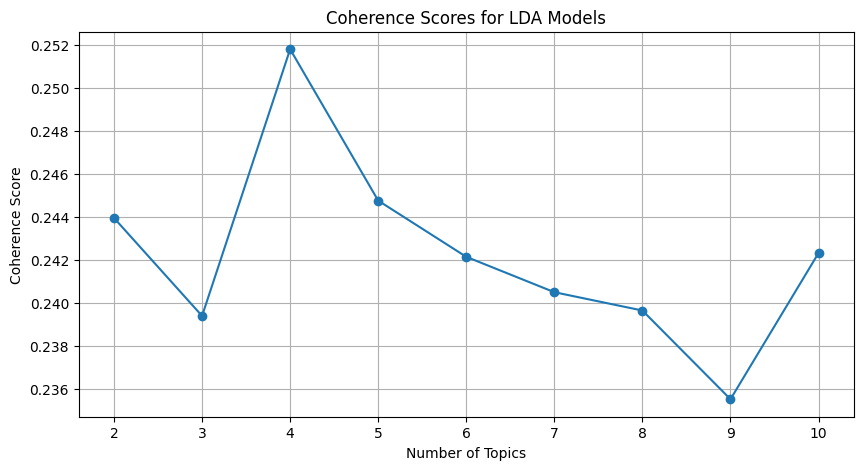

In [17]:
for i in range(min_topics, max_topics):
    model = gensim.models.LdaModel(doc_term_matrix, num_topics=i, id2word=dictionary)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=articles, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

plt.figure(figsize=(10, 5))
plt.plot(range(min_topics, max_topics), coherence_scores, marker='o')
plt.title('Coherence Scores for LDA Models')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(range(min_topics, max_topics))
plt.grid()
plt.show()